# CS156 Assignment 1

_Yoav Rabinovich, September 2018_
_________________________

### *Moore's Law*

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import datetime as dt 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math

In [2]:
#loading data
benchmarks = pd.read_csv('benchmarks.csv')

#extracting the date at datetime
date = benchmarks['testID']
date = date.str.extract(r'(-[0-9]+-)', expand=False)
benchmarks['testID'] = date.str.replace('-', '')
benchmarks = benchmarks.dropna()
#choosing test
test = benchmarks[benchmarks['benchName'] == '416.gamess']
test['testID'] = test['testID'].apply(lambda x: pd.to_datetime(x))

D:\Program Files\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [3]:
#sorting by dates
test = test.sort_values(by='testID')
test = test.sort_index()

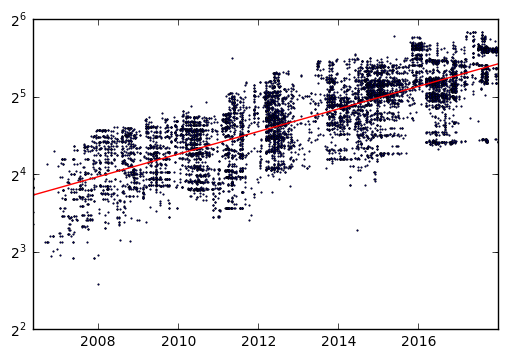

In [4]:
#training linear regression on log of data to fit exponential curve
x = test['testID']
#converting to ordinal for regression
x2 = pd.to_datetime(test['testID'])
x2 = x2.map(dt.datetime.toordinal)

y = test['base']
y2=y.apply(lambda x: math.log(x,2))

slope, intercept, _, _, _ = stats.linregress(x2, y2)
line = 2**(slope*x2+intercept)

#plotting on semi-log graph, exponential fit straightens out
plt.yscale('log',basey=2)
plt.plot_date(x, y, "o", markersize=1)
plt.plot_date(x, line, '-r')
plt.show()

This analysis doesn't support Moore's law, since computing speed seems to double every ~6 years rather than 2. However, more benchmarks should be tested over a longer period of time.

### Digit Classification

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV

D:\Program Files\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
#loading data
dataset = load_digits()
X = dataset["data"]
y = dataset["target"]

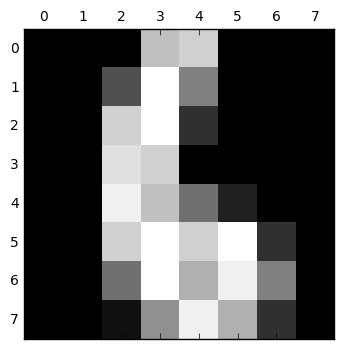

In [7]:
#displaying example
plt.gray() 
plt.matshow(dataset.images[6]) 
plt.show() 

In [8]:
#optimizing a 10-digit classifier (knn) with cross-validation and fitting the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

parameters_n = {'n_neighbors': [1, 3, 9]}
clf = GridSearchCV(KNN(), parameters_n,cv=5, scoring='accuracy')

clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 9]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [9]:
#presenting results
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print cm, "\n\n" ,classification_rep

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  0  0  0  0  0  0  0 48  0]
 [ 0  0  0  1  0  1  0  0  0 45]] 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       1.00      1.00      1.00        43
          2       1.00      0.98      0.99        44
          3       0.96      1.00      0.98        45
          4       1.00      1.00      1.00        38
          5       0.98      0.98      0.98        48
          6       1.00      1.00      1.00        52
          7       1.00      1.00      1.00        48
          8       1.00      1.00      1.00        48
          9       0.98      0.96      0.97        47

avg / total       0.99      0.99      0.99       450



In [10]:
#using entire* dataset, from a csv version of MNIST
training = pd.read_csv('mnist_train.csv')
testing = pd.read_csv('mnist_test.csv')

In [15]:
#*actually taking a large subset, so it would finish this millenioum
training_y = training.iloc[:2000,0]
training_x = training.iloc[:2000,1:]

testing_y = testing.iloc[:500,0]
testing_x = testing.iloc[:500,1:]

In [16]:
#optimizing and fitting as done above
parameters_n = {'n_neighbors': [1,3,9]}
clf2 = GridSearchCV(KNN(), parameters_n,cv=5, scoring='accuracy')

clf2.fit(training_x, training_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 9]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [17]:
#presenting results
y_pred2 = clf2.predict(testing_x)
cm = confusion_matrix(testing_y, y_pred2)
classification_rep = classification_report(testing_y, y_pred2)

print cm, "\n\n" ,classification_rep

[[42  0  0  0  0  0  0  0  0  0]
 [ 0 67  0  0  0  0  0  0  0  0]
 [ 0  2 44  1  0  0  1  6  1  0]
 [ 0  1  1 35  0  5  1  2  1  0]
 [ 0  1  0  0 44  0  1  0  0  9]
 [ 0  0  0  2  0 44  2  0  1  1]
 [ 2  0  0  0  1  1 39  0  0  0]
 [ 0  0  0  0  1  0  0 44  0  3]
 [ 2  0  2  0  0  1  2  2 28  3]
 [ 0  0  0  0  4  1  0  3  2 44]] 

             precision    recall  f1-score   support

          0       0.91      1.00      0.95        42
          1       0.94      1.00      0.97        67
          2       0.94      0.80      0.86        55
          3       0.92      0.76      0.83        46
          4       0.88      0.80      0.84        55
          5       0.85      0.88      0.86        50
          6       0.85      0.91      0.88        43
          7       0.77      0.92      0.84        48
          8       0.85      0.70      0.77        40
          9       0.73      0.81      0.77        54

avg / total       0.87      0.86      0.86       500



*Disclaimer*: This work was done in collaboration with Michelle and Kalia.